# Clasificación de imágenes

En este cuaderno exploraremos una tarea de clasificación de imágenes. En particular trataremos de entrenar un clasificador en el dataset [MNIST](http://yann.lecun.com/exdb/mnist/), el cual consiste en imágenes de los dígitos del 0 al 9 escritos por personas.

In [1]:
import numpy as np
import tensorflow as tf

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

11493376/11490434 [==============================] - 9s 1us/step


primero observemos los datos que tenemos

In [3]:
msg = "Shape of {} is {}"
print(msg.format('X_train', X_train.shape))
print(msg.format('y_train', y_train.shape))
print(msg.format('X_test', X_test.shape))
print(msg.format('y_test', y_test.shape))

Shape of X_train is (60000, 28, 28)
Shape of y_train is (60000,)
Shape of X_test is (10000, 28, 28)
Shape of y_test is (10000,)


tenemos 60mil imágenes de entrenamiento y 10mil de prueba, cada imagen tiene 28 pixeles de ancho y alto. Miremos unas cuantas

In [4]:
def sample_data(data, sample_size=5):
    indices = np.random.randint(0, data.shape[0], size=sample_size)
    return data[indices, ...]

In [5]:
def show_images(images):
    cols = 5
    rows = int(images.shape[0]/cols)
    
    fig = plt.figure(figsize=(rows*5, cols*5))
    
    for i in range(images.shape[0]):
        ax=fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i])
        ax.set_xticklabels([])
        ax.set_yticklabels([])

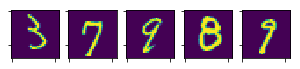

In [6]:
sample_images = sample_data(X_train)
show_images(sample_images)

Ahora hagamos nuestro primer modelo ...

In [7]:
model = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('clf', LinearSVC())
        
    ]
)
model.fit(X_train, y_train)

ValueError: Found array with dim 3. StandardScaler expected <= 2.

No funcionó!! La razón es que nos faltó el paso de convertir las imágenes en vectores. Podemos introducir fácilmente ese paso dentro de nuestro pipeline tilizando [FunctionTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) y [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html).

In [8]:
def reshape_fn(images):
    n, height, width = images.shape
    return np.reshape(images, (n, height*width))

In [9]:
model = Pipeline(
    [
        ('reshape', FunctionTransformer(reshape_fn, validate=False)),
        ('scaler', StandardScaler()),
        ('clf', LinearSVC())
        
    ]
)
model.fit(X_train, y_train)

c:\users\sebastian\documents\projects\github\cnns_intro\venv\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\sebastian\documents\projects\github\cnns_intro\venv\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\sebastian\documents\projects\github\cnns_intro\venv\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('reshape', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function reshape_fn at 0x000000003ABEF488>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=False)), ('scaler', StandardScaler(copy=True, with_mean=Tru...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [10]:
print("-------Report on train data-----------")
print(classification_report(y_train, model.predict(X_train)))
print("-------Report on test data-----------")
print(classification_report(y_test, model.predict(X_test)))

-------Report on train data-----------


c:\users\sebastian\documents\projects\github\cnns_intro\venv\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5923
           1       0.96      0.98      0.97      6742
           2       0.91      0.91      0.91      5958
           3       0.91      0.88      0.90      6131
           4       0.92      0.94      0.93      5842
           5       0.87      0.89      0.88      5421
           6       0.95      0.96      0.95      5918
           7       0.94      0.94      0.94      6265
           8       0.90      0.84      0.87      5851
           9       0.88      0.88      0.88      5949

   micro avg       0.92      0.92      0.92     60000
   macro avg       0.92      0.92      0.92     60000
weighted avg       0.92      0.92      0.92     60000

-------Report on test data-----------
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.95      0.98      0.97      1135
           2       0.93      0.88      0

c:\users\sebastian\documents\projects\github\cnns_intro\venv\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


**Ejercicio:** intenta cambiar el clasificador y sus hiperparámetros, qué es lo mejor que puedes lograr?